## :  Previous Script Available

In [298]:
import numpy as np
import matplotlib
import scipy
import sklearn
import statsmodels
import seaborn
import pydot
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.ar_model import AutoReg

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from scipy import stats
from scipy.stats.stats import mode
from scipy.stats import uniform
from sklearn.model_selection import (train_test_split, RepeatedKFold,RandomizedSearchCV)
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

import pickle


import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt





<ipython-input-298-f3582069050f>:18: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import mode


In [299]:
# execute this for the 1st time
# !pip install -r example-requirements.txt

# download file
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # linux

# and place in folder data/

--2023-09-30 16:30:21--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.12
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat.9’

data3SS2009.mat.9   100%[===================>] 255.24M  18.5MB/s    in 15s     

2023-09-30 16:30:37 (16.8 MB/s) - ‘data3SS2009.mat.9’ saved [267634147/267634147]



In [300]:
! pip install statsmodels==0.13.2

In [301]:
fname = join(getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [302]:
np.where(y==10)

(array([450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

In [303]:
y_bin_damaged = np.zeros((1,850))
y_bin_damaged[:,450:] = y_bin_damaged[:,450:] +1
y_bin_damaged

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

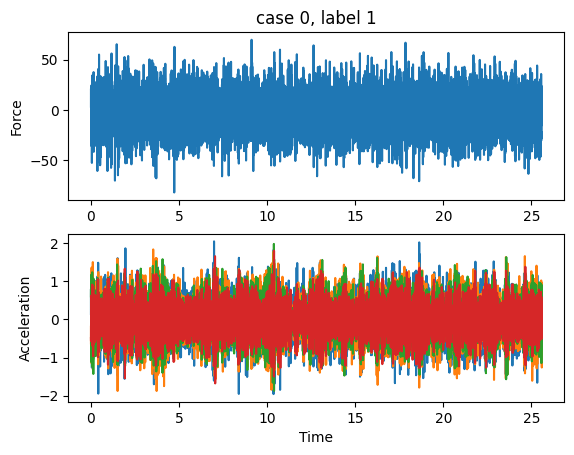

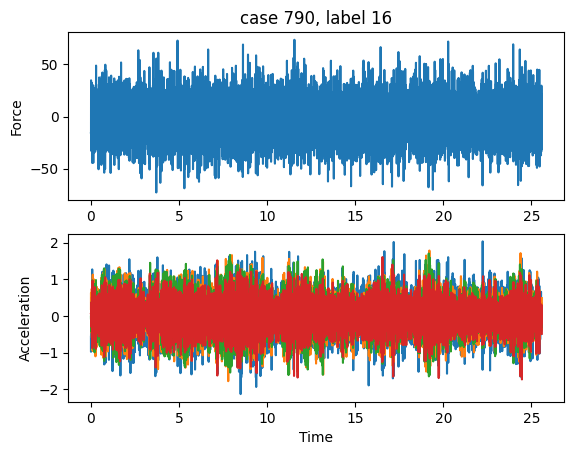

In [304]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [305]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))

X

print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)

matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)




```
# Isto está formatado como código
```



In [306]:


x_AR = []
na = 29
for i in range(0,850):
  AR2 = AutoReg(Ch2[:,i],na).fit()
  AR3 = AutoReg(Ch3[:,i],na).fit()
  AR4 = AutoReg(Ch4[:,i],na).fit()
  AR5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([AR2.params,AR3.params, AR4.params,AR5.params])
  x_AR.append(ARparams)
x_AR = np.array(x_AR)

In [307]:
x_AR.shape

(850, 120)

In [308]:

from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_pca = pca.fit_transform(x_AR)


print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (850, 6) 
 X_PCA: [[ 7.66136505 -1.41780663  0.80665171  0.89625556 -1.19463583 -0.13840328]
 [ 6.8869037  -1.70474591  0.96095314 -0.0090899  -1.74358116 -0.49638477]
 [ 6.94763838 -1.5554447   0.94936492  0.13319058 -0.83617666 -0.46298613]
 ...
 [-5.24160818 -1.38243332  1.19297854 -2.02374849 -0.32984218  0.81221121]
 [-5.06151016 -1.37825724  1.20604602 -0.0969439   0.34497989  0.90045879]
 [-5.24563384 -1.14354112  1.67658163  0.0533145   0.28827159  0.88529276]]


In [309]:
from sklearn.preprocessing import MinMaxScaler

XAR_max_min = MinMaxScaler(feature_range=(-1,1))
x1_train = XAR_max_min.fit_transform(x_AR)
x1_train

XPCA_max_min = MinMaxScaler(feature_range=(-1,1))
X2_train = XPCA_max_min.fit_transform(X_pca)
X2_train
print('Normalização:','\n XAR máximo normalizado: ', x1_train.max(), '\n XAR minimo normalizado: ',x1_train.min(),'\n XPCA máximo normalizado: ', X2_train.max(), '\n X2 minimo normalizado: ',X2_train.min())


Normalização: 
 XAR máximo normalizado:  1.0000000000000004 
 XAR minimo normalizado:  -1.0 
 XPCA máximo normalizado:  1.0000000000000004 
 X2 minimo normalizado:  -1.0


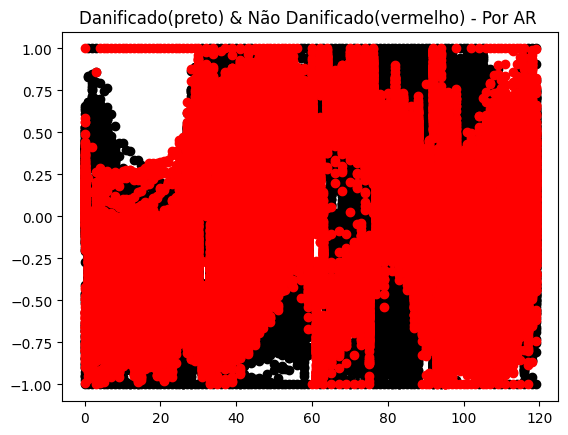

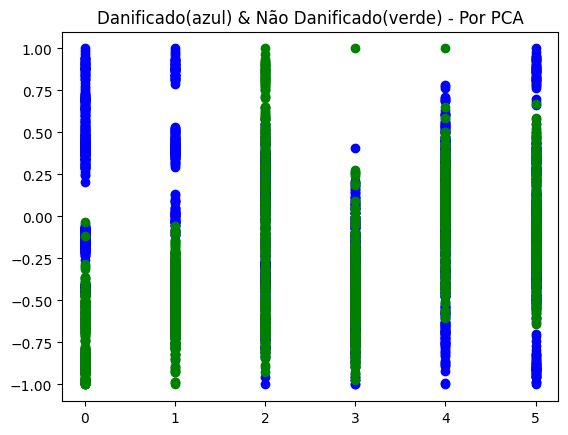

In [310]:


Y1 = np.array(range(0,120))
Y2 = np.array(range(0,6))

for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'Black'
  else:
    color_name = 'red'
    plt.title('Danificado(preto) & Não Danificado(vermelho) - Por AR ')
  plt.scatter(Y1,x1_train[case,:], color = color_name)
plt.show()

for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'green'
    plt.title('Danificado(azul) & Não Danificado(verde) - Por PCA')
  plt.scatter(Y2,X2_train[case,:], color = color_name)

plt.show()


In [311]:
from sklearn.linear_model import LogisticRegression

softmax_AR = LogisticRegression(random_state=0,max_iter= 2000).fit(x1_train,y)



predict_AR = softmax_AR.predict(x1_train)
probabilidade_AR = softmax_AR.predict_proba(x1_train)
score_AR = softmax_AR.score(x1_train,y)



print('score_AR', score_AR)

score_AR 0.9988235294117647


In [312]:
softmax_PCA = LogisticRegression(random_state=0,max_iter= 2000).fit(X2_train,y)

predict_PCA = softmax_PCA.predict(X2_train)
probabilidade_PCA= softmax_PCA.predict_proba(X2_train)
score_PCA = softmax_PCA.score(X2_train,y)



print('score_PCA', score_PCA)

score_PCA 0.908235294117647


In [313]:
from sklearn import svm

svc_linear_AR = svm.SVC(C=1.0, kernel='linear').fit(x1_train,y)
svc_poly_AR = svm.SVC(C=1.0, kernel='poly').fit(x1_train,y)
svc_rbf_AR = svm.SVC(C=1.0, kernel='rbf').fit(x1_train,y)
svc_sig_AR = svm.SVC(C=1.0, kernel='sigmoid').fit(x1_train,y)
#svc_prec_AR = svm.SVC(C=1.0, kernel='precomputed').fit(x1_train,y)


linear_predict_AR = svc_linear_AR.predict(x1_train)
poly_predict_AR = svc_poly_AR.predict(x1_train)
rbf_predict_AR = svc_rbf_AR.predict(x1_train)
sig_predict_AR = svc_sig_AR.predict(x1_train)
#prec_predict_AR=svc_prec_AR.predict(x1_train)

svm_linear_AR = svc_linear_AR.score(x1_train,y)
svm_ploy_AR = svc_poly_AR.score(x1_train,y)
svm_rbf_AR = svc_rbf_AR.score(x1_train,y)
svm_sig_AR = svc_sig_AR.score(x1_train,y)
#svm_prec_AR=svc_prec_AR.score(x1_train,y)

print('svm_linear_AR', svm_linear_AR, '\n svm_ploy_AR', svm_ploy_AR, '\n svm_rbf_AR', svm_rbf_AR, '\n svm_sig_AR', svm_sig_AR)

#print('svm_linear_AR', svm_linear_AR, '\n svm_ploy_AR', svm_ploy_AR, '\n svm_rbf_AR', svm_rbf_AR, '\n svm_sig_AR', svm_sig_AR,'\n svm_prec_AR', svm_prec_AR)


svm_linear_AR 1.0 
 svm_ploy_AR 0.9988235294117647 
 svm_rbf_AR 0.9976470588235294 
 svm_sig_AR 0.9847058823529412


In [314]:
svc_linear_PCA = svm.SVC(C=1.0, kernel='linear').fit(X2_train,y)
svc_poly_PCA = svm.SVC(C=1.0, kernel='poly').fit(X2_train,y)
svc_rbf_PCA = svm.SVC(C=1.0, kernel='rbf').fit(X2_train,y)
svc_sig_PCA = svm.SVC(C=1.0, kernel='sigmoid').fit(X2_train,y)

linear_predict_PCA = svc_linear_PCA.predict(X2_train)
poly_predict_PCA = svc_poly_PCA.predict(X2_train)
rbf_predict_PCA = svc_rbf_PCA.predict(X2_train)
sig_predict_PCA = svc_sig_PCA.predict(X2_train)

svm_linear_PCA = svc_linear_PCA.score(X2_train,y)
svm_poly_PCA = svc_poly_PCA.score(X2_train,y)
svm_rbf_PCA = svc_rbf_PCA.score(X2_train,y)
svm_sig_PCA = svc_sig_PCA.score(X2_train,y)

print('\n svm_linear_PCA', svm_linear_PCA, '\n svm_poly_PCA', svm_poly_PCA, '\n svm_rbf_PCA', svm_rbf_PCA, '\n svm_sig_PCA')


 svm_linear_PCA 0.9364705882352942 
 svm_poly_PCA 0.9341176470588235 
 svm_rbf_PCA 0.9364705882352942 
 svm_sig_PCA


In [315]:
from sklearn.neighbors import KNeighborsClassifier


knn_AR1 = KNeighborsClassifier(n_neighbors=5).fit(x1_train,y)
knn_AR2 = KNeighborsClassifier(n_neighbors=10).fit(x1_train,y)
knn_AR3 = KNeighborsClassifier(n_neighbors=15).fit(x1_train,y)
knn_AR4 = KNeighborsClassifier(n_neighbors=20).fit(x1_train,y)

knn_1_AR = knn_AR1.score(x1_train,y)
knn_2_AR = knn_AR2.score(x1_train,y)
knn_3_AR = knn_AR3.score(x1_train,y)
knn_4_AR = knn_AR4.score(x1_train,y)

knn_5_2 = KNeighborsClassifier(n_neighbors=5).fit(X2_train,y)
knn_10_2 = KNeighborsClassifier(n_neighbors=10).fit(X2_train,y)
knn_15_2 = KNeighborsClassifier(n_neighbors=15).fit(X2_train,y)
knn_20_2 = KNeighborsClassifier(n_neighbors=20).fit(X2_train,y)

knn_5_pca = knn_5_2.score(X2_train,y)
knn_10_pca = knn_10_2.score(X2_train,y)
knn_15_pca = knn_15_2.score(X2_train,y)
knn_20_pca = knn_15_2.score(X2_train,y)
print(' knn_1_AR', knn_1_AR, '\n knn_2_AR', knn_2_AR, '\n knn_3_AR', knn_3_AR, '\n knn_4_ar', knn_4_AR)
print('\n knn_5_pca', knn_5_pca, '\n knn_10_pca', knn_10_pca, '\n knn_15_pca', knn_15_pca, '\n knn_20_pca', knn_20_pca)

 knn_1_AR 0.9941176470588236 
 knn_2_AR 0.9894117647058823 
 knn_3_AR 0.9870588235294118 
 knn_4_ar 0.9870588235294118

 knn_5_pca 0.9376470588235294 
 knn_10_pca 0.9376470588235294 
 knn_15_pca 0.9294117647058824 
 knn_20_pca 0.9294117647058824


In [316]:
param_grid = []

param_grid.append(
    [
     {
      "LGR__C": stats.loguniform(1e-2,1e2),
     }
    ]
)


param_grid.append(
    [
     {
      "SVC__C": stats.loguniform(1e-2,1e2),
      "SVC__kernel": ["linear","poly","rbf","sigmoid"],
     }
    ]
)



param_grid.append(
    [
     {
      "KNN__n_neighbors": stats.randint(2,100),
      "KNN__weights": ["uniform","distance"],
     }
    ]
)


models = []

models.append(("LGR", LogisticRegression(max_iter=1000)))
models.append(("SVC",SVC()))
models.append(("KNN", KNeighborsRegressor()))

In [320]:
N_REPS=50
N_SPLITS=5
N_ITERS=100
models_list=['LGR','SVC','KNN']

In [321]:
from sklearn.model_selection import train_test_split



# AR

random_search_AR={}
param_grids_AR={}
yh_test_AR={}
acc1={}
for k in range(0,5):
  X_train_AR, X_test_AR, y_train_AR, y_test_AR = train_test_split(x1_train,y,
                                                                  test_size=0.6,
                                                                  random_state=42)
  rkf = RepeatedKFold(n_splits=N_SPLITS,n_repeats=N_REPS,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_AR[models_list[k]] = param_grid[k]
  random_search_AR[models_list[k]] = RandomizedSearchCV(clf,verbose=1,
                                                        scoring="neg_mean_squared_error",
                                                        param_distributions=param_grids_AR[models_list[k]],
                                                        n_iter=N_ITERS,
                                                        n_jobs=-1,
                                                        cv=rkf,
                                                        random_state=42)
  random_search_AR[models_list[k]].fit(X_train_AR,y_train_AR)

  yh_test_AR[models_list[k]] = random_search_AR[models_list[k]].predict(X_test_AR)
  acc1[models_list[k]] = random_search_AR[models_list[k]].score(X_test_AR, y_test_AR)
  print('Accuracy Score: ',models_list[k], ' AR: ', acc1[models_list[k]])

# PCA

random_search_PCA={}
param_grids_PCA={}
yh_test_PCA={}
acc2={}
for k in range(0,3):

  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X2_train,y,
                                                                      test_size=0.6,
                                                                      random_state=42)
  rkf = RepeatedKFold(n_splits=N_SPLITS,n_repeats=N_REPS,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_PCA[models_list[k]] = param_grid[k]
  random_search_PCA[models_list[k]] = RandomizedSearchCV(clf,verbose=1,
                                                         scoring="neg_mean_squared_error",
                                                         param_distributions=param_grids_PCA[models_list[k]],
                                                         n_iter=N_ITERS,
                                                         n_jobs=-1,
                                                         cv=rkf,
                                                         random_state=42)
  random_search_PCA[models_list[k]].fit(X_train_PCA,y_train_PCA)
  yh_test_PCA[models_list[k]] = random_search_PCA[models_list[k]].predict(X_test_PCA)
  acc2[models_list[k]] = random_search_PCA[models_list[k]].score(X_test_PCA, y_test_PCA)
  print('Accuracy Score: ',models_list[k], ' PCA: ', acc1[models_list[k]])

Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  LGR  AR:  -0.0
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  SVC  AR:  -0.00196078431372549
Fitting 250 folds for each of 100 candidates, totalling 25000 fits
Accuracy Score:  KNN  AR:  -0.14368662085453474


IndexError: ignored